# Python Project "Churn" – Part A 

### Submitted by:
#### Oriah Ben-Guy Mizrahi
#### Mordechai Nosov
#### Ruth Shkop 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [6]:
df_churn = pd.read_csv('churn.csv')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

In [3]:
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df_churn = df_churn.replace({"Churn":{"Yes":1,"No": 0}})
df_churn.Churn

C:\Users\rus25\AppData\Local\Temp\ipykernel_20700\756031911.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_churn = df_churn.replace({"Churn":{"Yes":1,"No": 0}})


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [5]:
customers = len(df_churn)
churn = sum(df_churn['Churn'])

print("We have %d customers but only %d of them had churned (%f%%)" % (customers, churn, (churn/customers*100)))

We have 7043 customers but only 1869 of them had churned (26.536987%)


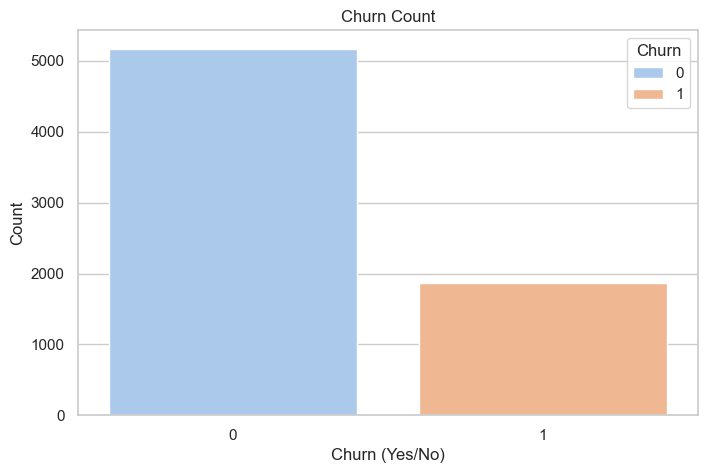

In [6]:
# Churn Count
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', hue='Churn', data=df_churn, palette='pastel')
plt.title('Churn Count')
plt.xlabel('Churn (Yes/No)')
plt.ylabel('Count')
plt.show()

#### Missing values

In [7]:
df_churn.TotalCharges = pd.to_numeric(df_churn.TotalCharges,errors='coerce')
df_churn.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
nan_mean = df_churn.isna().mean()
nan_mean

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [9]:
sum_TotalCharges = df_churn.TotalCharges.count()
sum_na_TotalCharges = df_churn.TotalCharges.isna().sum()
per_TotalCharges = sum_na_TotalCharges/sum_TotalCharges*100
per_TotalCharges

np.float64(0.15642775881683732)

0.16% of the the customers dont have a value in the column 'Total Charges'

#### Category columns

In [10]:
for n,v in df_churn.items():
    if df_churn[n].dtypes == 'object':
        print(n)
        print(df_churn[n].dtypes)
        print(df_churn[n].unique())
        

customerID
object
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
object
['Female' 'Male']
Partner
object
['Yes' 'No']
Dependents
object
['No' 'Yes']
PhoneService
object
['No' 'Yes']
MultipleLines
object
['No phone service' 'No' 'Yes']
InternetService
object
['DSL' 'Fiber optic' 'No']
OnlineSecurity
object
['No' 'Yes' 'No internet service']
OnlineBackup
object
['Yes' 'No' 'No internet service']
DeviceProtection
object
['No' 'Yes' 'No internet service']
TechSupport
object
['No' 'Yes' 'No internet service']
StreamingTV
object
['No' 'Yes' 'No internet service']
StreamingMovies
object
['No' 'Yes' 'No internet service']
Contract
object
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
object
['Yes' 'No']
PaymentMethod
object
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


### Aggrigations

In [11]:
df_churn.groupby('gender').agg({'Churn':['count','sum','mean']})

Churn               
       count  sum      mean
gender                     
Female  3488  939  0.269209
Male    3555  930  0.261603

There is not much of a difference between the genders.

In [12]:
df_churn.groupby('SeniorCitizen').agg({'Churn':['count','sum','mean']})

Churn                
              count   sum      mean
SeniorCitizen                      
0              5901  1393  0.236062
1              1142   476  0.416813

The senior citizens are twice as likely to leave

In [13]:
df_churn.groupby('Partner').agg({'Churn':['count','sum','mean']})

Churn                
        count   sum      mean
Partner                      
No       3641  1200  0.329580
Yes      3402   669  0.196649

The customers without a partner have a bigger chance to leave

In [14]:
df_churn.groupby('Dependents').agg({'Churn':['count','sum','mean']})

Churn                
           count   sum      mean
Dependents                      
No          4933  1543  0.312791
Yes         2110   326  0.154502

The customers without a dependents have a bigger chance to leave

In [15]:
df_churn.groupby(['Partner','Dependents']).agg({'Churn':['count','sum','mean']})

Churn                
                   count   sum      mean
Partner Dependents                      
No      No          3280  1123  0.342378
        Yes          361    77  0.213296
Yes     No          1653   420  0.254083
        Yes         1749   249  0.142367

The customers without a dependents rather they have a partner or not have a bigger chance to leave

In [16]:
df_churn.groupby('Contract').agg({'Churn':['count','sum','mean']})

Churn                
               count   sum      mean
Contract                            
Month-to-month  3875  1655  0.427097
One year        1473   166  0.112695
Two year        1695    48  0.028319

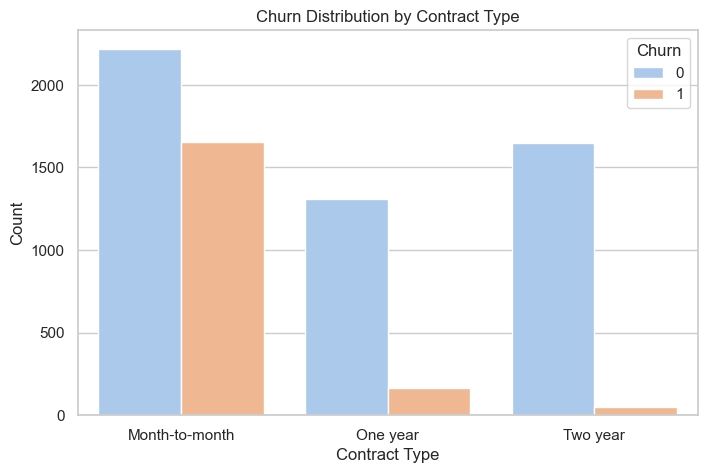

In [17]:
# Churn Distribution by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df_churn, palette='pastel')
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

The customers who pay monthly are more likely to leave

In [18]:
df_churn.groupby('PaymentMethod').agg({'Churn':['count','sum','mean']})

Churn                
                          count   sum      mean
PaymentMethod                                  
Bank transfer (automatic)  1544   258  0.167098
Credit card (automatic)    1522   232  0.152431
Electronic check           2365  1071  0.452854
Mailed check               1612   308  0.191067

The customers who pay by an electronic check are more likely to leave

In [19]:
df_churn.groupby('PaperlessBilling').agg({'Churn':['count','sum','mean']})

Churn                
                 count   sum      mean
PaperlessBilling                      
No                2872   469  0.163301
Yes               4171  1400  0.335651

In [20]:
df_churn.groupby(['PaperlessBilling','Contract']).agg({'Churn':['count','sum','mean']})

Churn                
                                count   sum      mean
PaperlessBilling Contract                            
No               Month-to-month  1289   406  0.314973
                 One year         673    48  0.071322
                 Two year         910    15  0.016484
Yes              Month-to-month  2586  1249  0.482985
                 One year         800   118  0.147500
                 Two year         785    33  0.042038

In [21]:
df_churn.groupby(['PaperlessBilling', 'PaymentMethod']).agg({'Churn':['count','sum','mean']})

Churn               
                                           count  sum      mean
PaperlessBilling PaymentMethod                                 
No               Bank transfer (automatic)   653   72  0.110260
                 Credit card (automatic)     640   64  0.100000
                 Electronic check            623  204  0.327448
                 Mailed check                956  129  0.134937
Yes              Bank transfer (automatic)   891  186  0.208754
                 Credit card (automatic)     882  168  0.190476
                 Electronic check           1742  867  0.497704
                 Mailed check                656  179  0.272866

The customers who receive their bills not by paper are more likely to leave

#### Tenure

In [22]:
df_churn['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

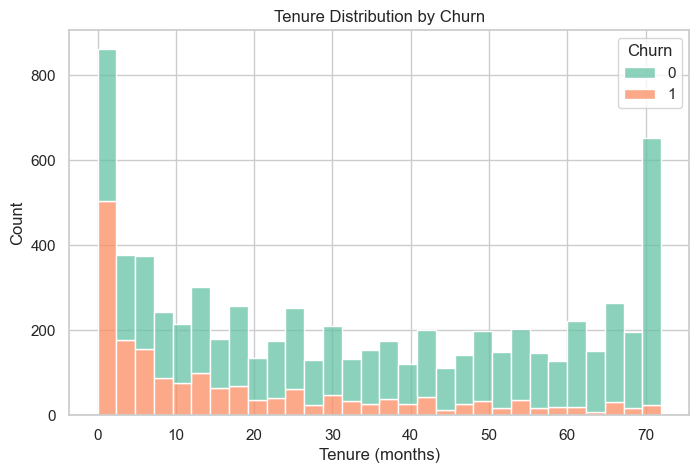

In [23]:
# Tenure Distribution by Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=df_churn, x='tenure', hue='Churn', multiple='stack', kde=False, palette='Set2', bins=30)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

The histograms show which values are more and less common along with their dispersion.
We can see that the majority tenure time is between 0 to 13 and between 65 to 70+.
In the 3 first months the chances for a customer to churn is more then 50% and as long as they stay longer the chances of them churning is getting smaller.

#### Tenure Group 

In [24]:
df_churn['tenureGroup'] = '0-3'
df_churn.loc[(df_churn['tenure'] >= 4) & (df_churn['tenure'] < 13),'tenureGroup'] = '4-12'
df_churn.loc[(df_churn['tenure'] >= 13) & (df_churn['tenure'] < 37),'tenureGroup'] = '13-36'
df_churn.loc[(df_churn['tenure'] >= 37) & (df_churn['tenure'] < 61),'tenureGroup'] = '37-60'
df_churn.loc[(df_churn['tenure'] >= 61),'tenureGroup'] = '61+'

df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-3
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,13-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-3
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-60
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-3


In [25]:
df_churn.groupby('tenureGroup').agg({'Churn':['count','sum','mean']})

Churn               
            count  sum      mean
tenureGroup                     
0-3          1062  597  0.562147
13-36        1856  474  0.255388
37-60        1594  265  0.166248
4-12         1124  440  0.391459
61+          1407   93  0.066098

It's more likely for a customer to churn in the first 3 months  try and in the first year.

In [26]:
df_churn.groupby(['Contract', 'tenureGroup']).agg({'Churn':['count','sum','mean']})

Churn               
                           count  sum      mean
Contract       tenureGroup                     
Month-to-month 0-3          1025  595  0.580488
               13-36        1223  436  0.356500
               37-60         550  171  0.310909
               4-12          969  429  0.442724
               61+           108   24  0.222222
One year       0-3            21    2  0.095238
               13-36         447   36  0.080537
               37-60         589   79  0.134126
               4-12          103   11  0.106796
               61+           313   38  0.121406
Two year       0-3            16    0  0.000000
               13-36         186    2  0.010753
               37-60         455   15  0.032967
               4-12           52    0  0.000000
               61+           986   31  0.031440

#### Service

In [27]:
services = ['PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df_churn['num_services'] = df_churn[services].apply(lambda x: (~x.str.startswith('No', na=False)).sum(), axis=1)
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureGroup,num_services
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-3,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,13-36,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-3,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-60,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-3,2


In [28]:
df_churn.groupby('num_services').agg({'Churn':['count','sum','mean']})

Churn               
             count  sum      mean
num_services                     
1             1264  138  0.109177
2              859  266  0.309662
3              846  380  0.449173
4              965  352  0.364767
5              922  289  0.313449
6              908  232  0.255507
7              676  152  0.224852
8              395   49  0.124051
9              208   11  0.052885

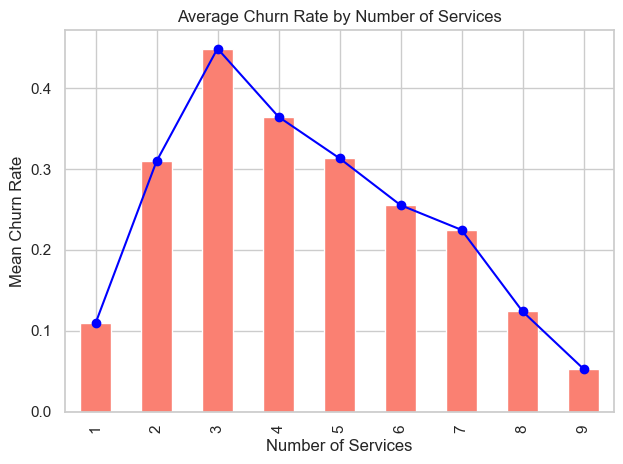

In [29]:
r=df_churn.groupby('num_services').agg({'Churn':['count','sum','mean']})
r.columns = ['count','sum','mean']

r['mean'].plot(kind='bar', color='salmon', title='Average Churn Rate by Number of Services')
x = range(len(r.index))  
y = r['mean'].values  
plt.plot(x, y, marker='o', color='blue', label='Trend Line')
plt.xlabel('Number of Services')
plt.ylabel('Mean Churn Rate')

plt.tight_layout()
plt.show()

##### Internet Services

In [30]:
internet_service = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df_churn['num_additinal_internet_services'] = df_churn[internet_service].apply(lambda x: (~x.str.startswith('No', na=False)).sum(), axis=1)

df_churn.loc[df_churn.InternetService == 'No', 'num_additinal_internet_services'] = -1

df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureGroup,num_services,num_additinal_internet_services
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-3,2,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,13-36,4,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-3,4,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-60,4,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-3,2,0


In [31]:
df_churn.groupby('InternetService').agg({'Churn':['count','sum','mean']})

Churn                
                count   sum      mean
InternetService                      
DSL              2421   459  0.189591
Fiber optic      3096  1297  0.418928
No               1526   113  0.074050

40% of the customer churn after using the Fiber optic internet service

In [32]:
df_internet_service = df_churn[['InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','num_additinal_internet_services','Churn']]

df_internet_service.loc[df_churn.InternetService != 'No', 'InternetService'] = 'Yes'

In [33]:
df_internet_service.groupby(['InternetService','num_additinal_internet_services']).agg({'Churn':['count','sum','mean']})

Churn               
                                                count  sum      mean
InternetService num_additinal_internet_services                     
No              -1                               1526  113  0.074050
Yes              0                                693  362  0.522367
                 1                                966  442  0.457557
                 2                               1033  370  0.358180
                 3                               1118  306  0.273703
                 4                                852  190  0.223005
                 5                                571   71  0.124343
                 6                                284   15  0.052817

There is a higher chance for a customer to churn if he has an Internet service and has less then 2 additinal services to the internet

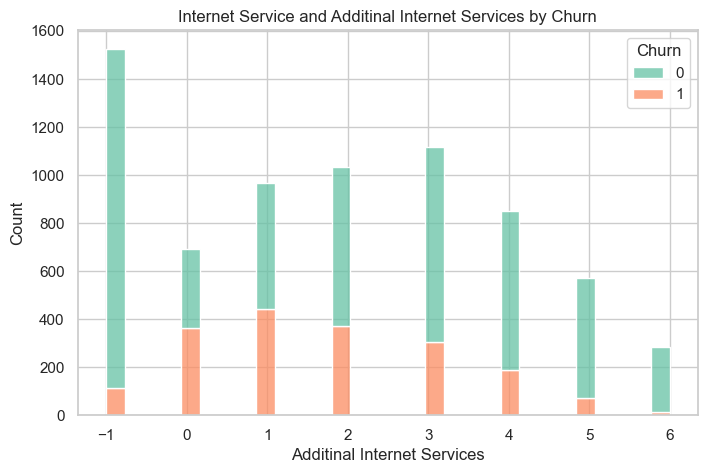

In [34]:
# Internet Service and Additinal Internet Services by Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=df_internet_service, x='num_additinal_internet_services', hue='Churn', multiple='stack', kde=False, palette='Set2', bins=30)
plt.title('Internet Service and Additinal Internet Services by Churn')
plt.xlabel('Additinal Internet Services')
plt.ylabel('Count')
plt.show()

#####Phone Services

In [35]:
df_churn.groupby(['PhoneService','MultipleLines']).agg({'Churn':['count','sum','mean']})

Churn               
                              count  sum      mean
PhoneService MultipleLines                        
No           No phone service   682  170  0.249267
Yes          No                3390  849  0.250442
             Yes               2971  850  0.286099

In [36]:
df_churn.loc[df_churn.PhoneService == "Yes"].groupby(['Dependents','MultipleLines']).agg({'Churn':['count','sum','mean']})

Churn               
                         count  sum      mean
Dependents MultipleLines                     
No         No             2337  680  0.290971
           Yes            2120  716  0.337736
Yes        No             1053  169  0.160494
           Yes             851  134  0.157462

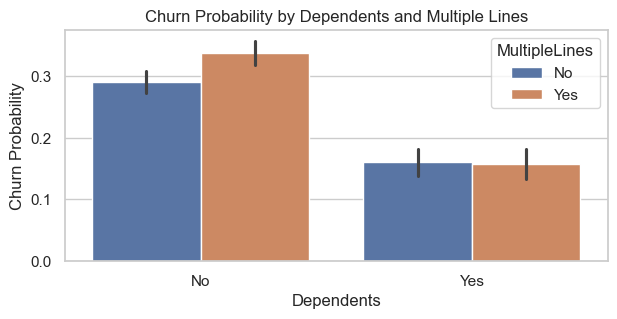

In [37]:
plt.figure(figsize=(7, 3))
sns.barplot(x='Dependents', y='Churn', hue='MultipleLines', data=df_churn.loc[df_churn.PhoneService == "Yes"])
plt.title('Churn Probability by Dependents and Multiple Lines')
plt.xlabel('Dependents')
plt.ylabel('Churn Probability')
plt.legend(title='MultipleLines')
plt.show()

There is almost no correlation between whether a customer has a dependents or not

In [38]:
df_churn.loc[df_churn.PhoneService == "Yes"].groupby(['Partner','MultipleLines']).agg({'Churn':['count','sum','mean']})

Churn               
                      count  sum      mean
Partner MultipleLines                     
No      No             1981  609  0.307420
        Yes            1289  482  0.373933
Yes     No             1409  240  0.170334
        Yes            1682  368  0.218787

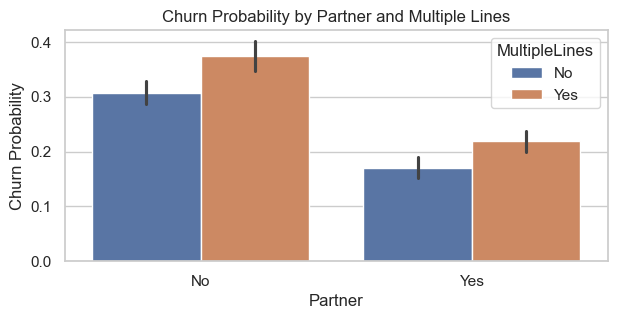

In [39]:
plt.figure(figsize=(7, 3))
sns.barplot(x='Partner', y='Churn', hue='MultipleLines', data=df_churn.loc[df_churn.PhoneService == "Yes"])
plt.title('Churn Probability by Partner and Multiple Lines')
plt.xlabel('Partner')
plt.ylabel('Churn Probability')
plt.legend(title='MultipleLines')
plt.show()

There is almost no correlation between whether a customer has a partner or not

#### Monthly Charges Group 

In [40]:
df_churn['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

C:\Users\rus25\AppData\Local\Temp\ipykernel_20700\3661123533.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_churn['MonthlyCharges'].dropna())


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

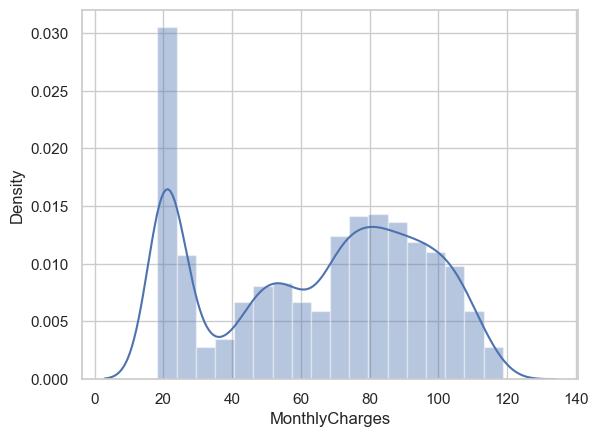

In [41]:
sns.distplot(df_churn['MonthlyCharges'].dropna())

In [42]:
df_churn['MonthlyChargesGroup'] = None
df_churn.loc[(df_churn['MonthlyCharges'] >= 0) & (df_churn['MonthlyCharges'] < 36),'MonthlyChargesGroup'] = '0-35'
df_churn.loc[(df_churn['MonthlyCharges'] >= 36) & (df_churn['MonthlyCharges'] < 71),'MonthlyChargesGroup'] = '36-70'
df_churn.loc[(df_churn['MonthlyCharges'] >= 71) & (df_churn['MonthlyCharges'] < 90),'MonthlyChargesGroup'] = '71-89'
df_churn.loc[(df_churn['MonthlyCharges'] >= 90),'MonthlyChargesGroup'] = '90+'

df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureGroup,num_services,num_additinal_internet_services,MonthlyChargesGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-3,2,1,0-35
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,0,13-36,4,2,36-70
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-3,4,2,36-70
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-60,4,3,36-70
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-3,2,0,36-70


In [43]:
df_churn.groupby('MonthlyChargesGroup').agg({'Churn':['count','sum','mean']})

Churn               
                    count  sum      mean
MonthlyChargesGroup                     
0-35                 1781  201  0.112858
36-70                1825  462  0.253151
71-89                1693  633  0.373892
90+                  1744  573  0.328555

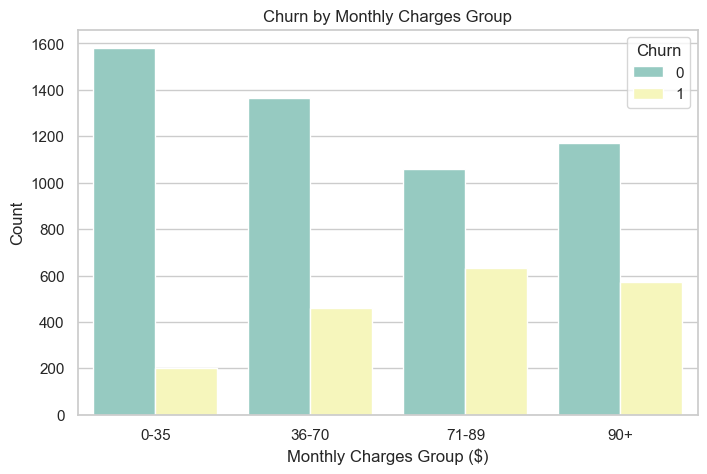

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(x='MonthlyChargesGroup', hue='Churn', data=df_churn, palette='Set3', order=['0-35', '36-70', '71-89', '90+'])
plt.title('Churn by Monthly Charges Group')
plt.xlabel('Monthly Charges Group ($)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

Customers that pay a monthly charge over then 71 are more likely to churn

Customers that use more services they would less likely to churn

# Prep

In [45]:
df_churn = pd.read_csv('churn.csv')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
df_churn.shape

(7043, 21)

## Data Cleaning

In [47]:
df_churn = df_churn.rename(columns=str.lower)
df_churn.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
df_churn = df_churn.drop(['customerid'], axis=1)

In [49]:
df_churn.totalcharges = pd.to_numeric(df_churn.totalcharges,errors='coerce')

In [50]:
# Taking off the null rows because it is only 1% the dataset

df_churn = df_churn.dropna(subset=['totalcharges'])
df_churn.shape

(7032, 20)

In [51]:
services = ['phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
df_churn['num_services'] = df_churn[services].apply(lambda x: (~x.str.startswith('No', na=False)).sum(), axis=1)

In [52]:
df_churn.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
num_services          int64
dtype: object

In [53]:
# Converting 'Yes' or 'No' columns into 1 or 0
l = []

for n,v in df_churn.items():
    if df_churn[n].dtypes == 'object':
        if set(df_churn[n].unique()) == {'Yes', 'No'}: 
            l.append(n)
            
print(l)

['partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn']


In [54]:
# Converting int into float
for n,v in df_churn.items():
    if df_churn[n].dtypes == 'int64':
        df_churn[n] = df_churn[n].astype('float')
        
for i in l:
    df_churn[i] = (df_churn[i] == 'Yes').astype('float')

In [55]:
df_churn.dtypes

gender               object
seniorcitizen       float64
partner             float64
dependents          float64
tenure              float64
phoneservice        float64
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling    float64
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn               float64
num_services        float64
dtype: object

In [56]:
df_churn.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,num_services
0,Female,0.0,1.0,0.0,1.0,0.0,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,1.0,Electronic check,29.85,29.85,0.0,2.0
1,Male,0.0,0.0,0.0,34.0,1.0,No,DSL,Yes,No,...,No,No,No,One year,0.0,Mailed check,56.95,1889.50,0.0,4.0
2,Male,0.0,0.0,0.0,2.0,1.0,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,1.0,Mailed check,53.85,108.15,1.0,4.0
3,Male,0.0,0.0,0.0,45.0,0.0,No phone service,DSL,Yes,No,...,Yes,No,No,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0,4.0
4,Female,0.0,0.0,0.0,2.0,1.0,No,Fiber optic,No,No,...,No,No,No,Month-to-month,1.0,Electronic check,70.70,151.65,1.0,2.0


In [57]:
df_churn = df_churn.applymap(lambda x: 'No' if isinstance(x, str) and x.startswith('No ') else x)

C:\Users\rus25\AppData\Local\Temp\ipykernel_20700\4142578220.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_churn = df_churn.applymap(lambda x: 'No' if isinstance(x, str) and x.startswith('No ') else x)


In [58]:
df_churn.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,num_services
0,Female,0.0,1.0,0.0,1.0,0.0,No,DSL,No,Yes,...,No,No,No,Month-to-month,1.0,Electronic check,29.85,29.85,0.0,2.0
1,Male,0.0,0.0,0.0,34.0,1.0,No,DSL,Yes,No,...,No,No,No,One year,0.0,Mailed check,56.95,1889.50,0.0,4.0
2,Male,0.0,0.0,0.0,2.0,1.0,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,1.0,Mailed check,53.85,108.15,1.0,4.0
3,Male,0.0,0.0,0.0,45.0,0.0,No,DSL,Yes,No,...,Yes,No,No,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0,4.0
4,Female,0.0,0.0,0.0,2.0,1.0,No,Fiber optic,No,No,...,No,No,No,Month-to-month,1.0,Electronic check,70.70,151.65,1.0,2.0


In [59]:
df_churn = pd.get_dummies(df_churn)
df_churn.head()

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,num_services,...,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0.0,1.0,0.0,1.0,0.0,1.0,29.85,29.85,0.0,2.0,...,False,True,False,True,False,False,False,False,True,False
1,0.0,0.0,0.0,34.0,1.0,0.0,56.95,1889.50,0.0,4.0,...,False,True,False,False,True,False,False,False,False,True
2,0.0,0.0,0.0,2.0,1.0,1.0,53.85,108.15,1.0,4.0,...,False,True,False,True,False,False,False,False,False,True
3,0.0,0.0,0.0,45.0,0.0,0.0,42.30,1840.75,0.0,4.0,...,False,True,False,False,True,False,True,False,False,False
4,0.0,0.0,0.0,2.0,1.0,1.0,70.70,151.65,1.0,2.0,...,False,True,False,True,False,False,False,False,True,False


In [60]:
for n,v in df_churn.items():
    if df_churn[n].dtypes == 'bool': 
        df_churn[n] = df_churn[n].astype('float')

In [61]:
df_churn.dtypes

seniorcitizen                              float64
partner                                    float64
dependents                                 float64
tenure                                     float64
phoneservice                               float64
paperlessbilling                           float64
monthlycharges                             float64
totalcharges                               float64
churn                                      float64
num_services                               float64
gender_Female                              float64
gender_Male                                float64
multiplelines_No                           float64
multiplelines_Yes                          float64
internetservice_DSL                        float64
internetservice_Fiber optic                float64
internetservice_No                         float64
onlinesecurity_No                          float64
onlinesecurity_Yes                         float64
onlinebackup_No                

In [62]:
df_churn.head()

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,num_services,...,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0.0,1.0,0.0,1.0,0.0,1.0,29.85,29.85,0.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,34.0,1.0,0.0,56.95,1889.50,0.0,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,2.0,1.0,1.0,53.85,108.15,1.0,4.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,45.0,0.0,0.0,42.30,1840.75,0.0,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,1.0,1.0,70.70,151.65,1.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Finding interesting relationships

In [63]:
df_churn.describe()

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,num_services,...,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,4.147184,...,0.384386,0.611633,0.388367,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,2.312294,...,0.486484,0.487414,0.487414,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,4.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
df_churn.corr()

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,num_services,...,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
seniorcitizen,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541,0.118053,...,0.105445,-0.119842,0.119842,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
partner,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982,0.196272,...,0.124483,-0.118108,0.118108,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
dependents,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128,-0.005637,...,-0.016499,0.038375,-0.038375,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049,0.474370,...,0.280264,-0.285402,0.285402,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
phoneservice,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691,0.083675,...,-0.021383,0.033477,-0.033477,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
paperlessbilling,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454,0.240039,...,0.224241,-0.211583,0.211583,0.168296,-0.052278,-0.146281,-0.017469,-0.013726,0.208427,-0.203981
monthlycharges,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858,0.851408,...,0.629668,-0.627235,0.627235,0.058933,0.004810,-0.073256,0.042410,0.030055,0.271117,-0.376568
totalcharges,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484,0.777388,...,0.515709,-0.519867,0.519867,-0.446776,0.170569,0.358036,0.186119,0.182663,-0.060436,-0.294708
churn,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000,-0.019644,...,0.063254,-0.060860,0.060860,0.404565,-0.178225,-0.301552,-0.118136,-0.134687,0.301455,-0.090773
num_services,0.118053,0.196272,-0.005637,0.474370,0.083675,0.240039,0.851408,0.777388,-0.019644,1.000000,...,0.675821,-0.679313,0.679313,-0.213348,0.095750,0.157345,0.110452,0.117287,0.083045,-0.317498


<Axes: >

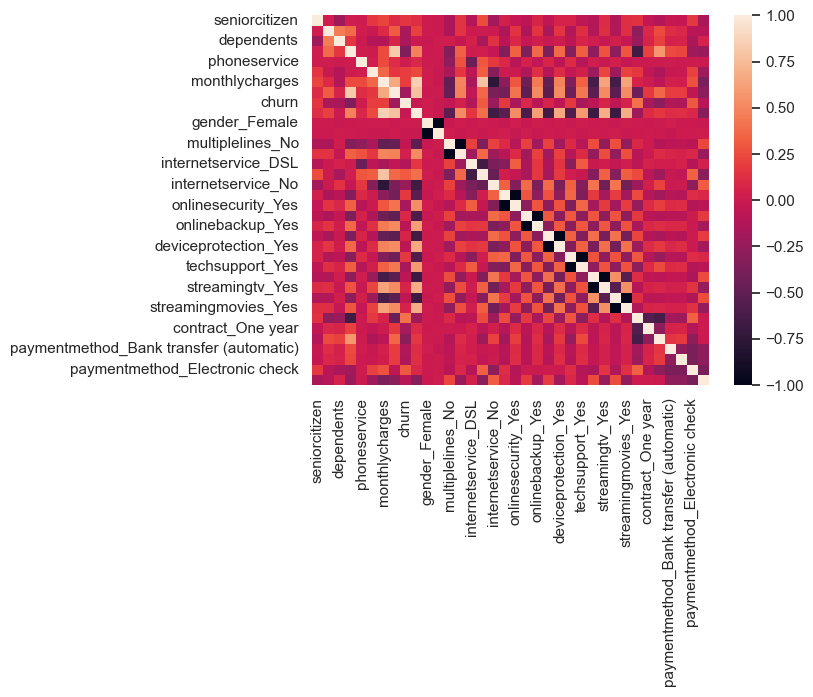

In [65]:
sns.heatmap(df_churn.corr())

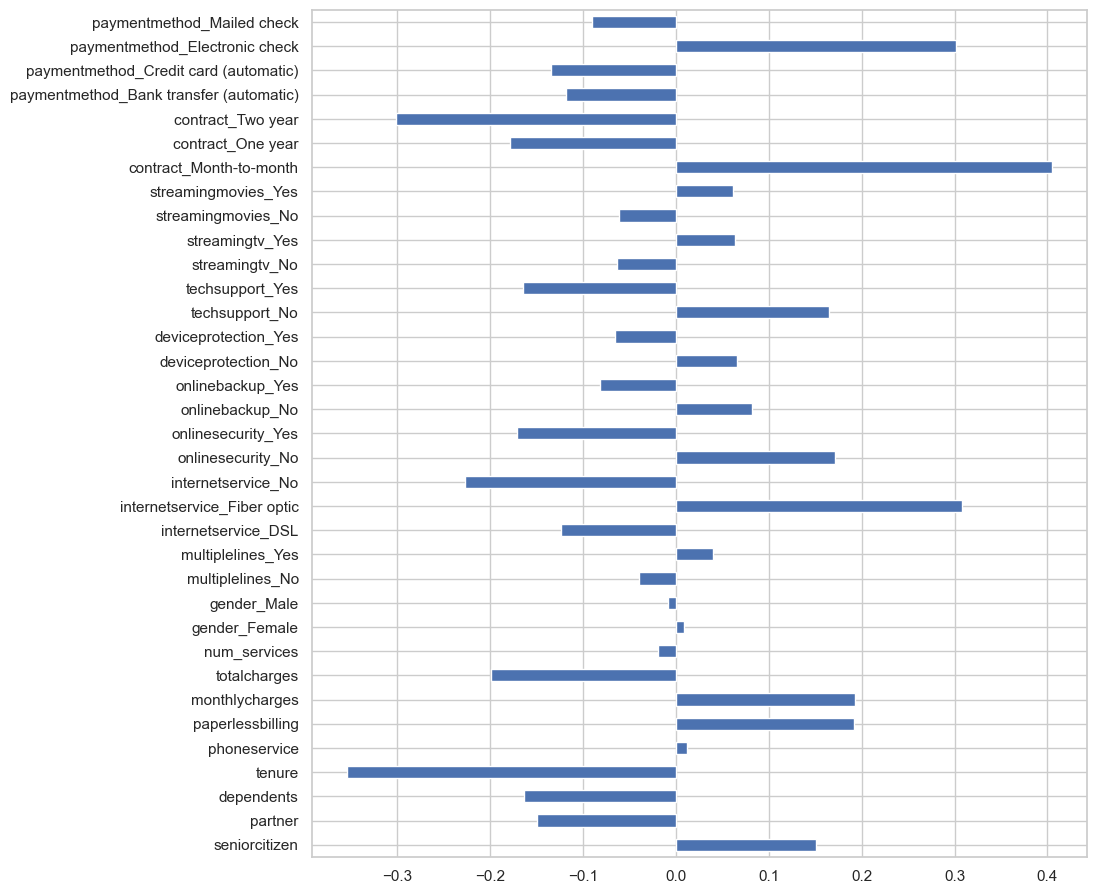

In [66]:
plt.figure(figsize=(10, 11))

df_churn.corr().churn.drop('churn').plot(kind='barh')


plt.show()

# ML Algorithms

In [4]:
#Data Prep

df_churn = pd.read_csv('churn.csv')
df_churn = df_churn.rename(columns=str.lower)
df_churn.totalcharges = pd.to_numeric(df_churn.totalcharges,errors='coerce')
df_churn = df_churn.dropna(subset=['totalcharges'])

services = ['phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
df_churn['num_services'] = (df_churn[services] != 'No').sum(axis=1)

l = []

for n,v in df_churn.items():
    if df_churn[n].dtypes == 'object':
        if set(df_churn[n].unique()) == {'Yes', 'No'}: 
            l.append(n)

for n,v in df_churn.items():
    if df_churn[n].dtypes == 'int64':
        df_churn[n] = df_churn[n].astype('float')

for i in l:
    df_churn[i] = (df_churn[i] == 'Yes').astype('float')
    
df_churn = df_churn.applymap(lambda x: 'No' if isinstance(x, str) and x.startswith('No ') else x)

df_churn_aside = df_churn['customerid']
df_churn = df_churn.drop(['customerid'], axis=1)

df_churn = pd.get_dummies(df_churn)
df_churn = df_churn.join(df_churn_aside)

for n,v in df_churn.items():
    if df_churn[n].dtypes == 'bool': 
        df_churn[n] = df_churn[n].astype('float')

C:\Users\7338797\AppData\Local\Temp\ipykernel_28744\1624062332.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_churn = df_churn.applymap(lambda x: 'No' if isinstance(x, str) and x.startswith('No ') else x)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

## Dividing the data to train & test

In [17]:
t_s = int(len(df_churn)*0.2)

train, test = train_test_split(df_churn, test_size= t_s, random_state=0, shuffle=True)

In [18]:
# train
# ------------------------------------------------
x_train = train.drop('churn', axis=1)
x_train = x_train.drop('customerid', axis=1)

y_train = train['churn']

cusid_train = train['customerid']


# test
# ------------------------------------------------
x_test = test.drop('churn', axis=1)
x_test = x_test.drop('customerid', axis=1)

y_test = test['churn']

cusid_test = test['customerid']

## Desition Tree algorithm

#### Finding the optimal depth

In [84]:
df_test = pd.DataFrame({'max_depth':[None], 'accuracy_score':[None]})

i = 1

for v in range(1,201):
    clf = DecisionTreeClassifier(max_depth=v)
    clf.fit(x_train, y_train)
    y_test_pred_DecisionTree = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
    df_test.loc[i] = [v,test_acc]
    i += 1

df_test.drop([0], inplace=True)
df_test.reset_index(inplace = True, drop=True)

df_test

C:\Users\rus25\AppData\Local\Temp\ipykernel_20700\405620071.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test.loc[i] = [v,test_acc]


,max_depth,accuracy_score
0,1.0,0.737553
1,2.0,0.763869
2,3.0,0.788762
3,4.0,0.789474
4,5.0,0.790185
...,...,...
195,196.0,0.721906
196,197.0,0.729018
197,198.0,0.730441
198,199.0,0.725462


In [85]:
print(df_test.accuracy_score.max())
df_test.loc[df_test.accuracy_score == df_test.accuracy_score.max()]

0.7901849217638691


,max_depth,accuracy_score
4,5.0,0.790185


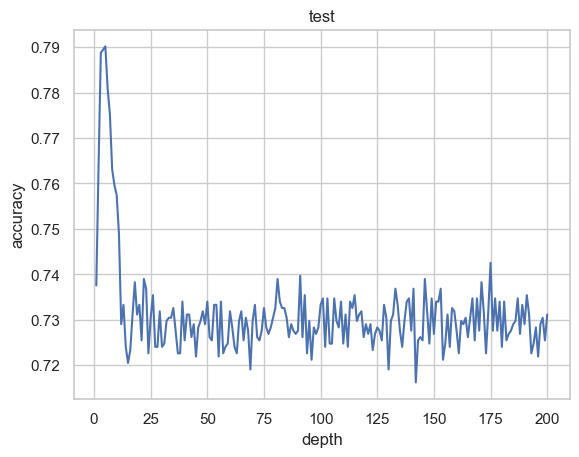

In [86]:
plt.plot(df_test.max_depth, df_test.accuracy_score)
plt.title('test')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.show()

In [87]:
df_train = pd.DataFrame({'max_depth':[None], 'accuracy_score':[None]})

i = 1

for v in range(1,201):
    clf = DecisionTreeClassifier(max_depth=v)
    clf.fit(x_train, y_train)
    y_train_pred_DecisionTree = clf.predict(x_train)
    test_acc = accuracy_score(y_train, y_train_pred_DecisionTree)
    df_train.loc[i] = [v,test_acc]
    i += 1

df_train.drop([0], inplace=True)
df_train.reset_index(inplace = True, drop=True)

df_train

C:\Users\rus25\AppData\Local\Temp\ipykernel_20700\1959588360.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_train.loc[i] = [v,test_acc]


,max_depth,accuracy_score
0,1.0,0.733381
1,2.0,0.761642
2,3.0,0.791504
3,4.0,0.794703
4,5.0,0.800747
...,...,...
195,196.0,0.997867
196,197.0,0.997867
197,198.0,0.997867
198,199.0,0.997867


In [88]:
print(df_train.accuracy_score.max())
df_train.loc[df_train.accuracy_score == df_train.accuracy_score.max()]

0.997867045858514


,max_depth,accuracy_score
26,27.0,0.997867
27,28.0,0.997867
28,29.0,0.997867
29,30.0,0.997867
30,31.0,0.997867
...,...,...
195,196.0,0.997867
196,197.0,0.997867
197,198.0,0.997867
198,199.0,0.997867


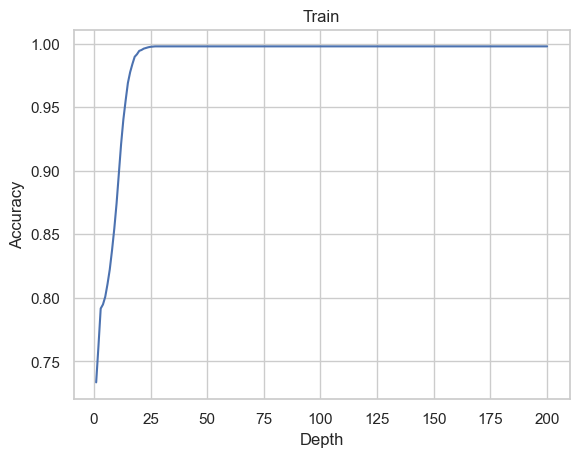

In [89]:
plt.plot(df_train.max_depth, df_train.accuracy_score)
plt.title('Train')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

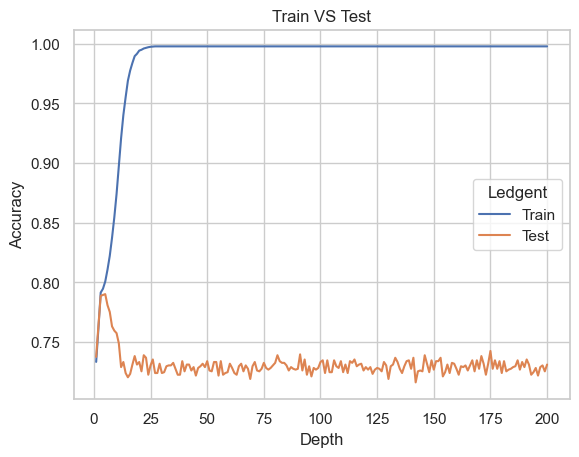

In [90]:
plt.plot(df_train.max_depth, df_train.accuracy_score, label ="Train")
plt.plot(df_test.max_depth, df_test.accuracy_score, label ="Test")
plt.title('Train VS Test')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend(title='Ledgent', loc='center right')
plt.show()

### Plotting The Tree

In [91]:
n=int(df_test.loc[df_test.accuracy_score == df_test.accuracy_score.max()].max_depth)
n

C:\Users\rus25\AppData\Local\Temp\ipykernel_20700\2600590486.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  n=int(df_test.loc[df_test.accuracy_score == df_test.accuracy_score.max()].max_depth)


5

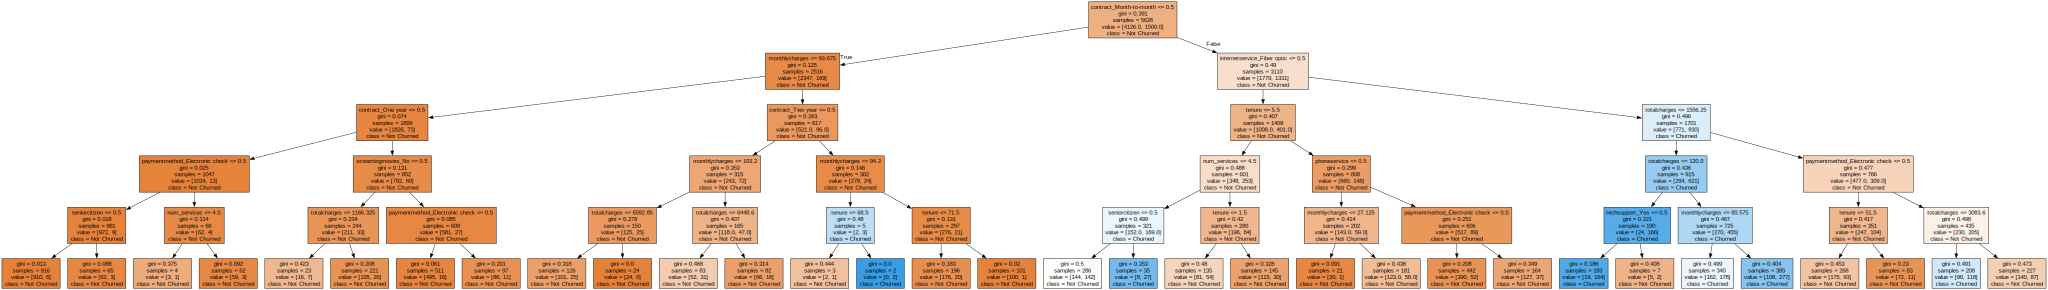

In [92]:
clf = DecisionTreeClassifier(max_depth=n)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)

def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(clf, x_train.columns, ['Not Churned', 'Churned'])

## Random Forest algorithm

In [19]:
from sklearn.ensemble import RandomForestClassifier

### Evaluation for Random Forest

In [21]:
df_forest = pd.DataFrame({'num_trees': [None], 'max_depth':[None], 'accuracy_score':[None]})

i = 1

for t in range(1,50):
    for v in range(1,30):
        model = RandomForestClassifier(n_estimators=t, max_depth=v, random_state=1)
        model.fit(x_train, y_train) 
        y_test_pred_RandomForest = model.predict(x_test)
        test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
        df_forest.loc[i] = [t,v,test_acc]
        i += 1

df_forest.drop([0], inplace=True)
df_forest.reset_index(inplace = True, drop=True)

df_forest

C:\Users\7338797\AppData\Local\Temp\ipykernel_29792\3365371730.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_forest.loc[i] = [t,v,test_acc]


,num_trees,max_depth,accuracy_score
0,1.0,1.0,0.737553
1,1.0,2.0,0.737553
2,1.0,3.0,0.763158
3,1.0,4.0,0.753912
4,1.0,5.0,0.781650
...,...,...,...
1416,49.0,25.0,0.785917
1417,49.0,26.0,0.783784
1418,49.0,27.0,0.786629
1419,49.0,28.0,0.787340


In [22]:
print(df_forest.accuracy_score.max())
df_forest.loc[df_forest.accuracy_score == df_forest.accuracy_score.max()]

0.8115220483641536


,num_trees,max_depth,accuracy_score
327,12.0,9.0,0.811522


In [23]:
model = RandomForestClassifier(n_estimators=t, max_depth=v, random_state=1)
model.fit(x_train, y_train) 

y_test_pred_RandomForest = model.predict(x_test)

output = pd.DataFrame({'customerid': cusid_test, 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_RandomForest}) 
output

,customerid,churn_what_actualy_happened,churn_predicted_by_model
5561,5088-QZLRL,0.0,1.0
5814,0787-LHDYT,0.0,0.0
2645,8562-GHPPI,0.0,0.0
3983,1334-FJSVR,1.0,0.0
6438,3551-HUAZH,1.0,1.0
...,...,...,...
1578,1205-WNWPJ,1.0,0.0
2757,0197-PNKNK,0.0,0.0
5702,5287-QWLKY,1.0,0.0
1662,2058-DCJBE,1.0,1.0


### Evaluating Feature Importance

In [25]:
feature_importances = model.feature_importances_
feature_importances 

array([0.02093151, 0.02159333, 0.0198054 , 0.1337847 , 0.00589075,
       0.02596234, 0.1528984 , 0.16953092, 0.04677978, 0.0169891 ,
       0.01736823, 0.01176482, 0.01108281, 0.01301574, 0.02607327,
       0.01015295, 0.01281337, 0.01221249, 0.01128718, 0.01224888,
       0.0117471 , 0.01080743, 0.01256667, 0.01096015, 0.01072482,
       0.00910579, 0.01099376, 0.01160552, 0.0583105 , 0.01372054,
       0.02189192, 0.01094034, 0.01107282, 0.03251123, 0.01085542])

In [26]:
features = x_train.columns 
stats = pd.DataFrame({'feature':features, 'importance':feature_importances})
stats.sort_values('importance', ascending=False)

,feature,importance
7,totalcharges,0.169531
6,monthlycharges,0.152898
3,tenure,0.133785
28,contract_Month-to-month,0.058311
8,num_services,0.046780
33,paymentmethod_Electronic check,0.032511
14,internetservice_Fiber optic,0.026073
5,paperlessbilling,0.025962
30,contract_Two year,0.021892
1,partner,0.021593


In [27]:
stats.importance.sum()

np.float64(1.0)

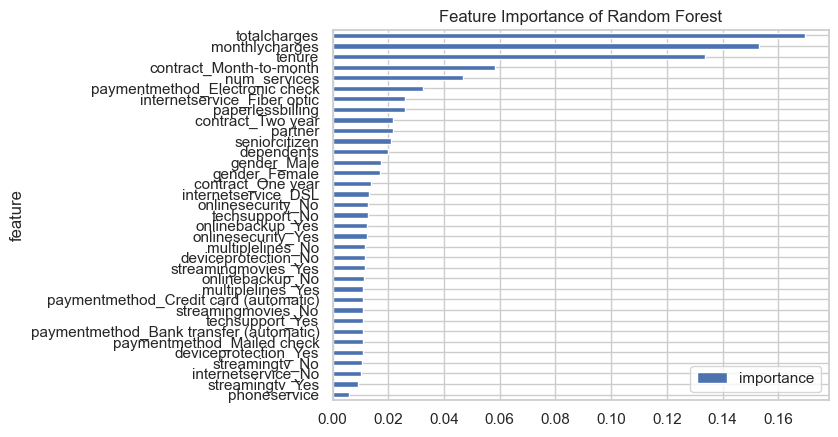

In [28]:
stats_sort = stats.sort_values('importance', ascending=True)           
stats_sort.plot(y='importance', x='feature', kind='barh')           
plt.title('Feature Importance of Random Forest');

# KNN - K Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler

### Unnormalized data

In [30]:
df_knn = pd.DataFrame({'max_neighbors':[None], 'accuracy_score':[None]})

i = 1

for v in range(1,100):
    clf = KNeighborsClassifier(n_neighbors=v)       
    clf.fit(x_train, y_train) 
    y_test_pred_Knn = clf.predict(x_test) 
    test_acc = accuracy_score(y_test, y_test_pred_Knn)
    df_knn.loc[i] = [v,test_acc]
    i += 1

df_knn.drop([0], inplace=True)
df_knn.reset_index(inplace = True, drop=True)

df_knn

C:\Users\7338797\AppData\Local\Temp\ipykernel_29792\2767890961.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_knn.loc[i] = [v,test_acc]


,max_neighbors,accuracy_score
0,1.0,0.716927
1,2.0,0.755334
2,3.0,0.743243
3,4.0,0.767425
4,5.0,0.763869
...,...,...
94,95.0,0.780939
95,96.0,0.780939
96,97.0,0.780228
97,98.0,0.778094


In [31]:
print(df_knn.accuracy_score.max())
df_knn.loc[df_knn.accuracy_score == df_knn.accuracy_score.max()]

0.7894736842105263


,max_neighbors,accuracy_score
22,23.0,0.789474


### Normalized data

In [32]:
scaler = StandardScaler() 

x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test) 


In [33]:
df_knn_scaled = pd.DataFrame({'max_neighbors':[None], 'accuracy_score':[None]})

i = 1

for v in range(1,100):
    clf = KNeighborsClassifier(n_neighbors=v)       
    clf.fit(x_train_scaled, y_train) 
    y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)
    test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
    df_knn_scaled.loc[i] = [v,test_acc]
    i += 1

df_knn.drop([0], inplace=True)
df_knn.reset_index(inplace = True, drop=True)

df_knn

C:\Users\7338797\AppData\Local\Temp\ipykernel_29792\51577045.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_knn_scaled.loc[i] = [v,test_acc]


,max_neighbors,accuracy_score
0,2.0,0.755334
1,3.0,0.743243
2,4.0,0.767425
3,5.0,0.763869
4,6.0,0.773826
...,...,...
93,95.0,0.780939
94,96.0,0.780939
95,97.0,0.780228
96,98.0,0.778094


In [34]:
print(df_knn_scaled.accuracy_score.max())
df_knn_scaled.loc[df_knn_scaled.accuracy_score == df_knn_scaled.accuracy_score.max()]

0.802275960170697


,max_neighbors,accuracy_score
59,59.0,0.802276


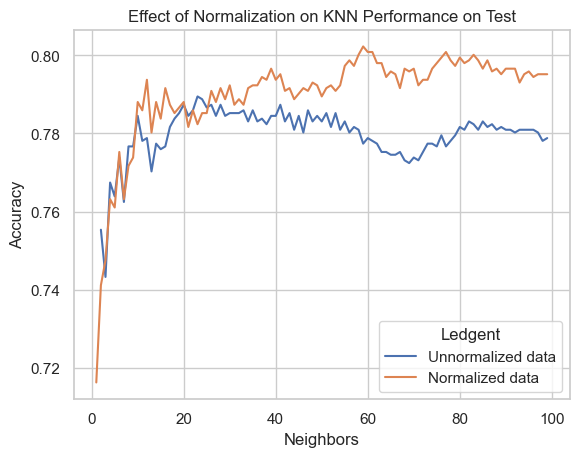

In [35]:
plt.plot(df_knn.max_neighbors, df_knn.accuracy_score, label = 'Unnormalized data')
plt.plot(df_knn_scaled.max_neighbors, df_knn_scaled.accuracy_score, label = 'Normalized data')
plt.title('Effect of Normalization on KNN Performance on Test')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.legend(title='Ledgent', loc='lower right')
plt.show()

After normilazing the data, the prediction accuracy is 1.28% higher.

# Evaluation + Benchmark

In [36]:
import numpy as np

In [37]:
y_train.value_counts()

churn
0.0    4126
1.0    1500
Name: count, dtype: int64

In [38]:
def get_benchmark_predictions(x, benchmark_value):
    return np.ones(len(x))*benchmark_value

In [39]:
benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc

0.7375533428165008

### Model Best Accuracy Result:
* Decision tree: 79.02% <br>
* Random Forest: 81.15% <br>
* KNN (Unnormalized data): 78.94% <br>
* KNN (Normalized data): 80.22% <br>
* Benchmark performance on test: 73.7%.<br>
 #### Conclusion: The algorithms we preformed beat the benchmark performance